# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.305576e+01     1.524467e+01
 * time: 0.0032701492309570312
     1     6.441597e+01     9.193875e+00
 * time: 0.009576082229614258
     2     5.785854e+01     1.201718e+01
 * time: 0.0232999324798584
     3     4.145119e+01     8.540067e+00
 * time: 0.04113197326660156
     4     3.030113e+01     7.967326e+00
 * time: 0.05940103530883789
     5     2.273464e+01     5.817178e+00
 * time: 0.07505607604980469
     6     2.046003e+01     6.759479e+00
 * time: 0.08822107315063477
     7     9.504583e+00     2.268948e+00
 * time: 0.1587200164794922
     8     7.569035e+00     2.496403e+00
 * time: 0.1723041534423828
     9     6.776024e+00     2.026646e+00
 * time: 0.18552303314208984
    10     6.503080e+00     3.507340e+00
 * time: 0.19617104530334473
    11     6.228068e+00     1.871090e+00
 * time: 0.20715904235839844
    12     5.983262e+00     1.428050e+00
 * time: 0.21781206130981445
    13     5.807647e+00     1.571200e+00
 * time:

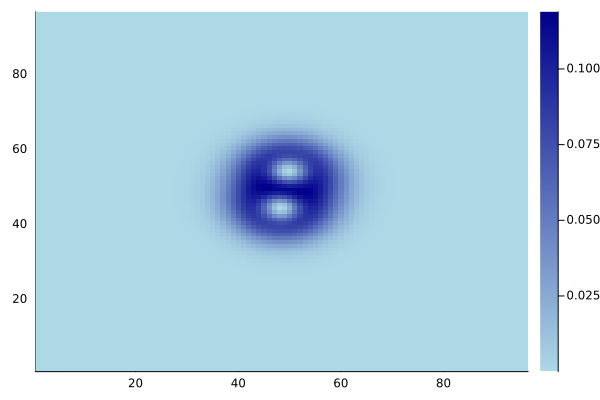

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)